# Data Cleaning  

### Data cleaning with NumPy 

In [27]:
import numpy as np
print(np.__version__)

1.26.4


In [47]:

# load datasets
data = np.genfromtxt('uncleaned_complex_dataset_v2.csv', delimiter=',', skip_header=1)
data

array([[1.9165e+04, 3.4000e+01,        nan, ..., 4.0000e+00,        nan,
        4.0000e+00],
       [1.3080e+04, 2.7000e+01,        nan, ..., 1.8000e+01,        nan,
        3.0000e+00],
       [1.7400e+04, 6.0000e+01,        nan, ..., 5.0000e+00,        nan,
        1.0000e+00],
       ...,
       [1.9503e+04, 2.4000e+01,        nan, ..., 1.0000e+01,        nan,
        1.0000e+00],
       [1.6787e+04, 2.7000e+01,        nan, ..., 6.0000e+00,        nan,
        4.0000e+00],
       [1.6409e+04, 3.3000e+01,        nan, ..., 8.0000e+00,        nan,
        1.0000e+00]])

In [48]:
# check for missing values in the dataset
missing_values = np.isnan(data).sum()
print(missing_values)


# check information about the dataset
np.info(data)

# check missing values in each column
missing_values = np.isnan(data).sum(axis=0)
print(missing_values)

# check missing values in each row
missing_values = np.isnan(data).sum(axis=1)
print(missing_values)

50638
class:  ndarray
shape:  (10020, 11)
strides:  (88, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0xc28a910
byteorder:  little
byteswap:  False
type: float64
[    0     0 10020 10020 10020     0    50 10020     0 10020   488]
[5 5 5 ... 5 5 5]


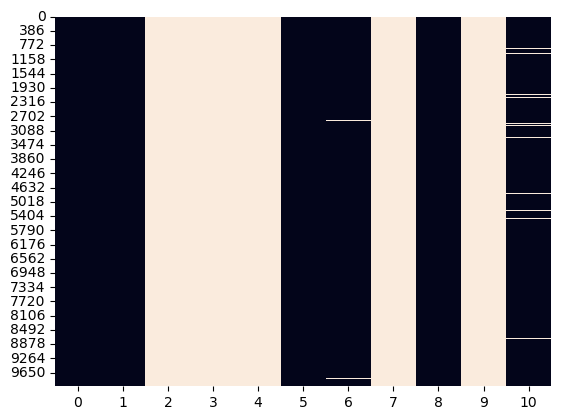

In [49]:
# see missing values in the dataset by graphical representation
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(np.isnan(data), cbar=False)
plt.show()

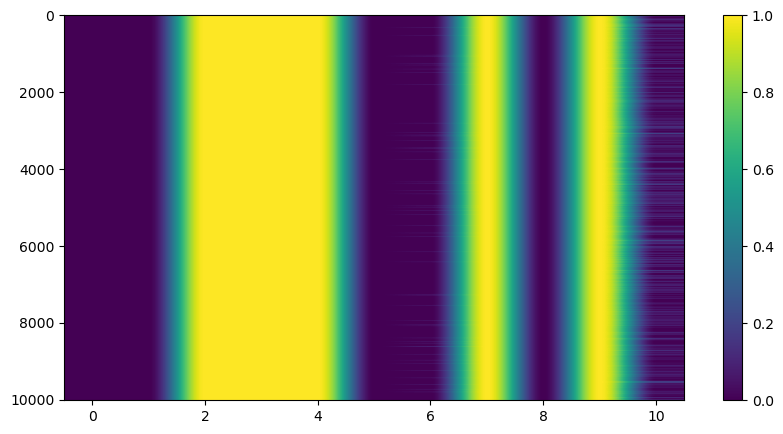

In [50]:
# another way to see missing values in the dataset by graphical representation
plt.figure(figsize=(10, 5))
plt.imshow(np.isnan(data), aspect='auto')
plt.colorbar()
plt.show()

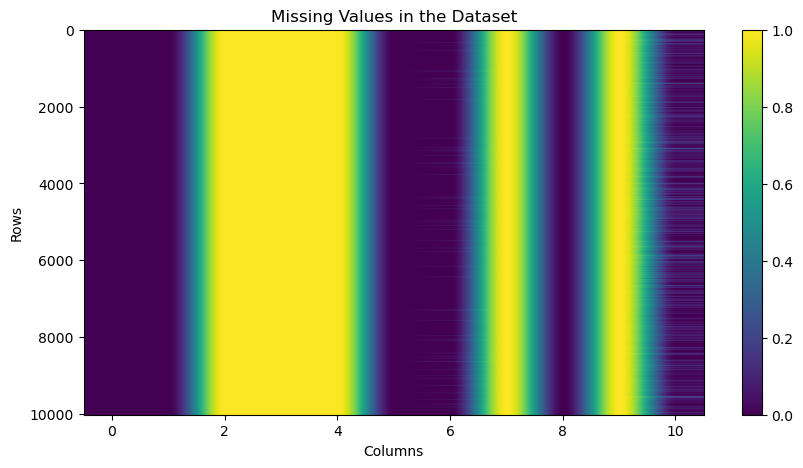

In [42]:
# another way to see missing values in the dataset by graphical representation
plt.figure(figsize=(10, 5))
plt.imshow(np.isnan(data), aspect='auto')
plt.colorbar()
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values in the Dataset')
plt.show()


Text(0.5, 1.0, 'Missing Values in the Dataset')

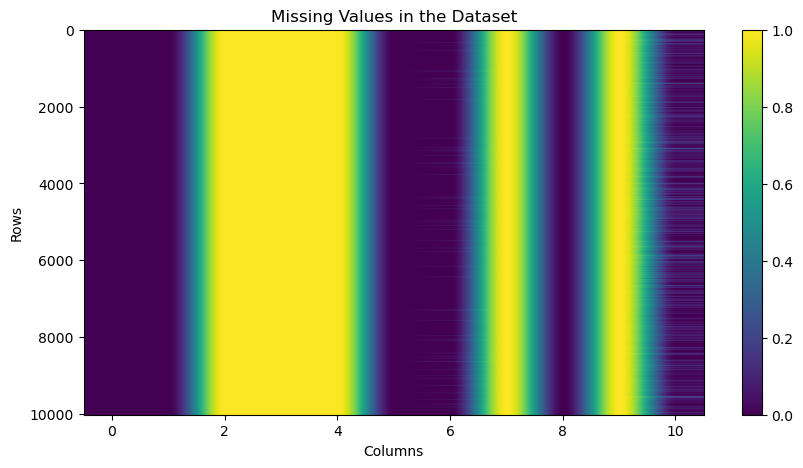

In [51]:
# another way to see missing values in the dataset by graphical representation
plt.figure(figsize=(10, 5))
plt.imshow(np.isnan(data), aspect='auto')
plt.colorbar()
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values in the Dataset')


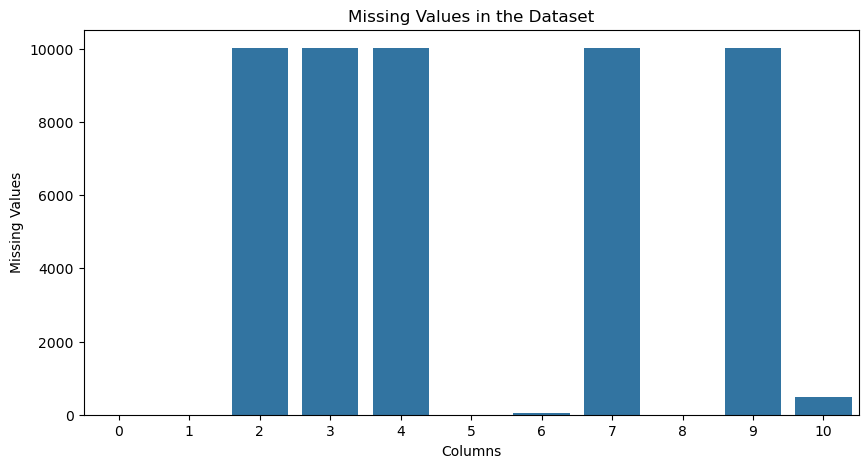

In [52]:
# using seaborn to see missing in the dataset of bar plot of each column with missing values
missing_values = np.isnan(data).sum(axis=0)
plt.figure(figsize=(10, 5))
sns.barplot(x=np.arange(data.shape[1]), y=missing_values)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values in the Dataset')
plt.show()

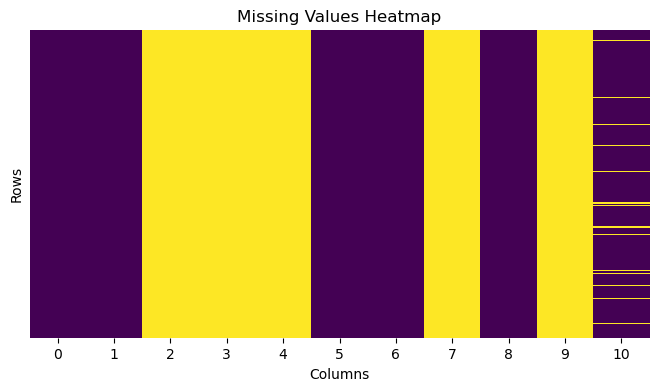

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Convert to a mask: True if value is missing (np.nan), False if not
missing_mask = np.isnan(data)

# Plotting a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(missing_mask, cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


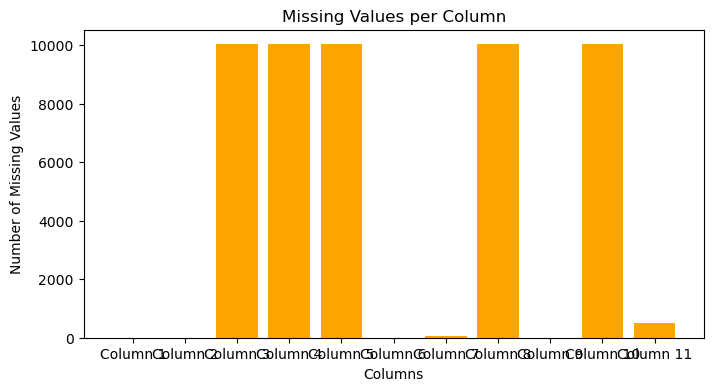

In [54]:
import numpy as np
import matplotlib.pyplot as plt


# Calculate the number of missing values per column
missing_count = np.isnan(data).sum(axis=0)

# Plot a bar chart
columns = [f'Column {i+1}' for i in range(data.shape[1])]
plt.figure(figsize=(8, 4))
plt.bar(columns, missing_count, color='orange')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()


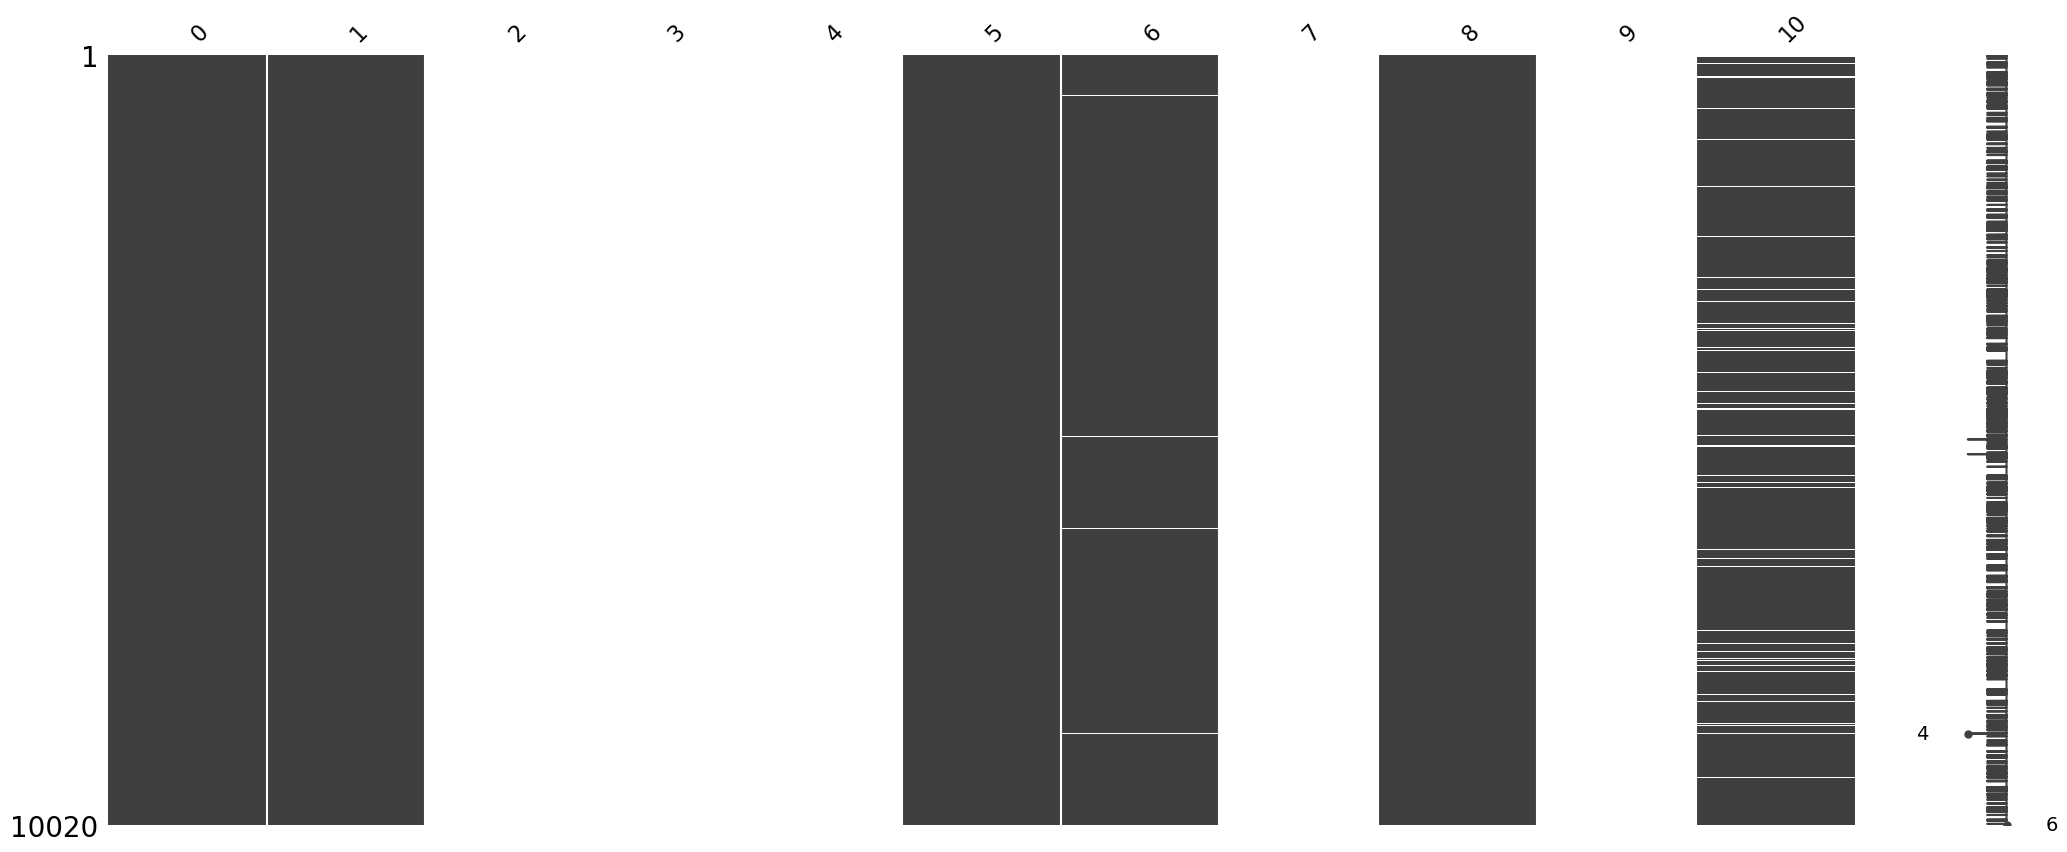

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno


df = pd.DataFrame(data)

# Visualizing missing values with missingno
msno.matrix(df)
plt.show()


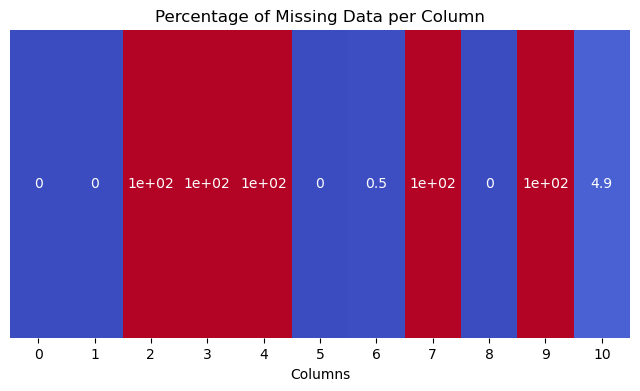

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.DataFrame(data)

# Calculate percentage of missing data per column
missing_percentage = df.isnull().mean() * 100

# Plotting a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap([missing_percentage], annot=True, cmap='coolwarm', cbar=False)
plt.title('Percentage of Missing Data per Column')
plt.xlabel('Columns')
plt.yticks([], [])  # Remove y-axis ticks
plt.show()


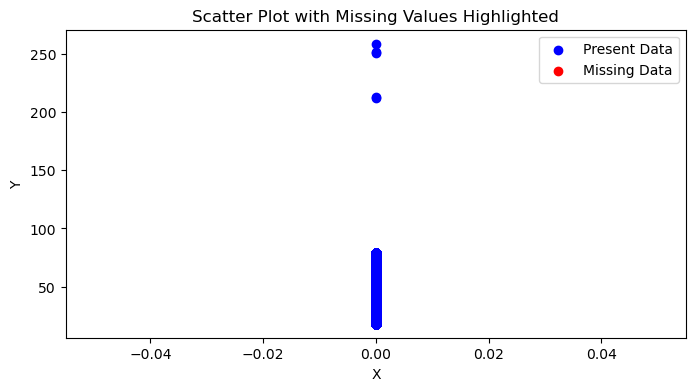

In [64]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Sample dataset with missing values
# x = np.array([1, 2, 3, 4, 5])
# y = np.array([2.5, np.nan, 8.5, 11.5, np.nan])

# # Plot data
# plt.figure(figsize=(8, 4))
# plt.scatter(x[~np.isnan(y)], y[~np.isnan(y)], color='blue', label='Present Data')
# plt.scatter(x[np.isnan(y)], [0]*np.isnan(y).sum(), color='red', label='Missing Data')
# plt.title('Scatter Plot with Missing Values Highlighted')
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.legend()
# plt.show()

# now your dataset 
import numpy as np
import matplotlib.pyplot as plt

# dataset of uncleaned_complex_dataset_v2.csv
x=np.isnan(data[:,0])
y=data[:,1] 

# Plot data
plt.figure(figsize=(8, 4))
plt.scatter(x[~np.isnan(y)], y[~np.isnan(y)], color='blue', label='Present Data')
plt.scatter(x[np.isnan(y)], [0]*np.isnan(y).sum(), color='red', label='Missing Data')
plt.title('Scatter Plot with Missing Values Highlighted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()



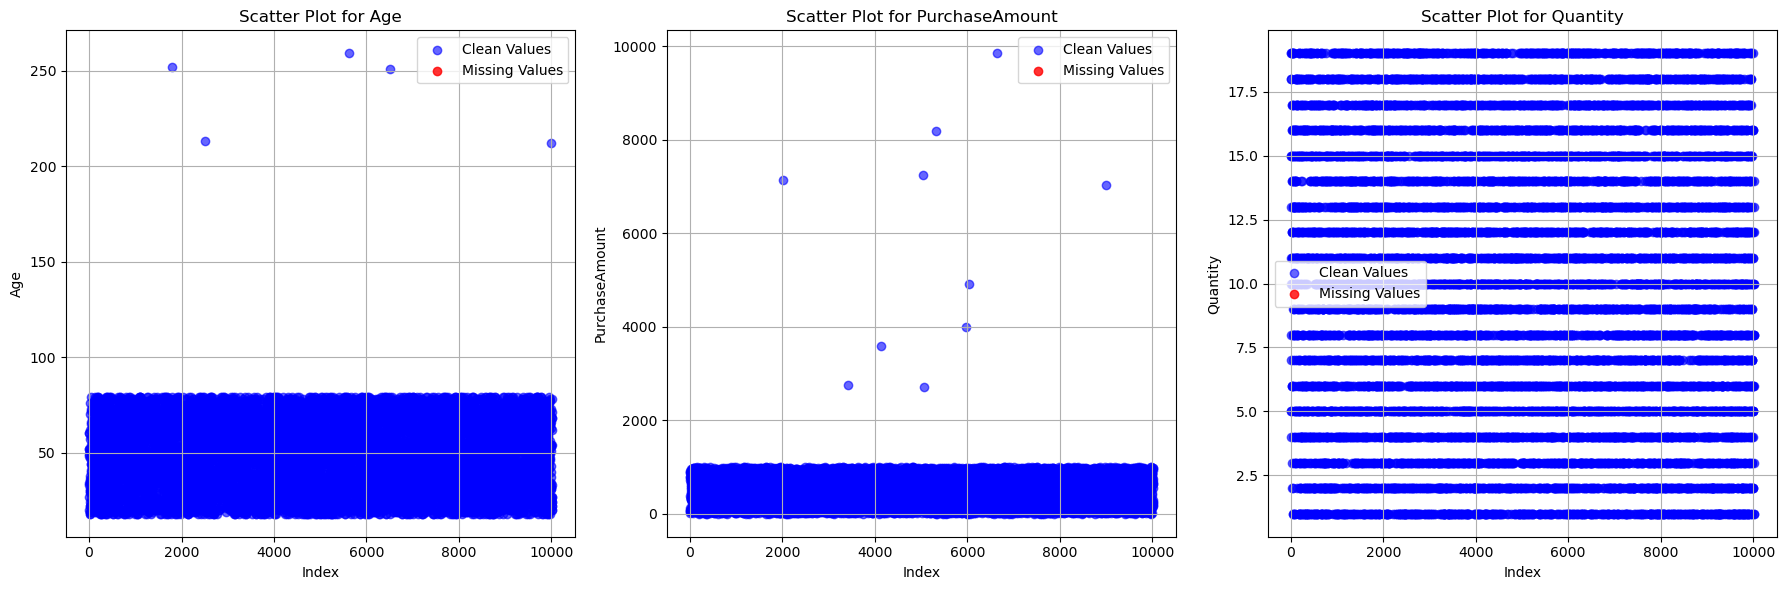

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('uncleaned_complex_dataset_v2.csv')

# Columns to visualize
numerical_columns = ['Age', 'PurchaseAmount', 'Quantity']

# Plot each numerical column with missing values highlighted
plt.figure(figsize=(18, 6))

for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    
    # Determine indices for clean and missing values
    clean_indices = df[df[column].notnull()].index
    missing_indices = df[df[column].isnull()].index
    
    # Scatter plot clean values in blue
    plt.scatter(clean_indices, df.loc[clean_indices, column], color='blue', alpha=0.6, label='Clean Values')
    
    # Scatter plot missing values in red
    plt.scatter(missing_indices, df.loc[missing_indices, column], color='red', alpha=0.8, label='Missing Values')
    
    # Titles and labels
    plt.title(f'Scatter Plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


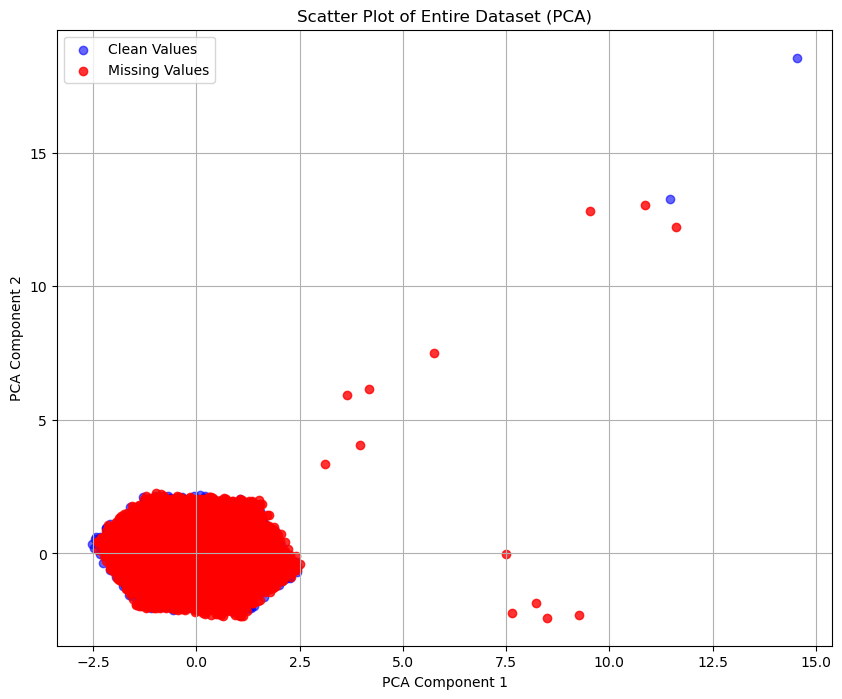

In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns only
numerical_data = df[numerical_columns]

# Standardize the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data.fillna(0))  # Fill NaNs with 0 for PCA purposes

# Perform PCA to reduce data to 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a scatter plot of the entire dataset
plt.figure(figsize=(10, 8))

# Determine indices for clean and missing values
clean_indices = df.dropna().index
missing_indices = df[df.isnull().any(axis=1)].index

# Scatter plot clean values in blue
plt.scatter(pca_data[clean_indices, 0], pca_data[clean_indices, 1], color='blue', alpha=0.6, label='Clean Values')

# Scatter plot missing values in red
plt.scatter(pca_data[missing_indices, 0], pca_data[missing_indices, 1], color='red', alpha=0.8, label='Missing Values')

# Titles and labels
plt.title('Scatter Plot of Entire Dataset (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()


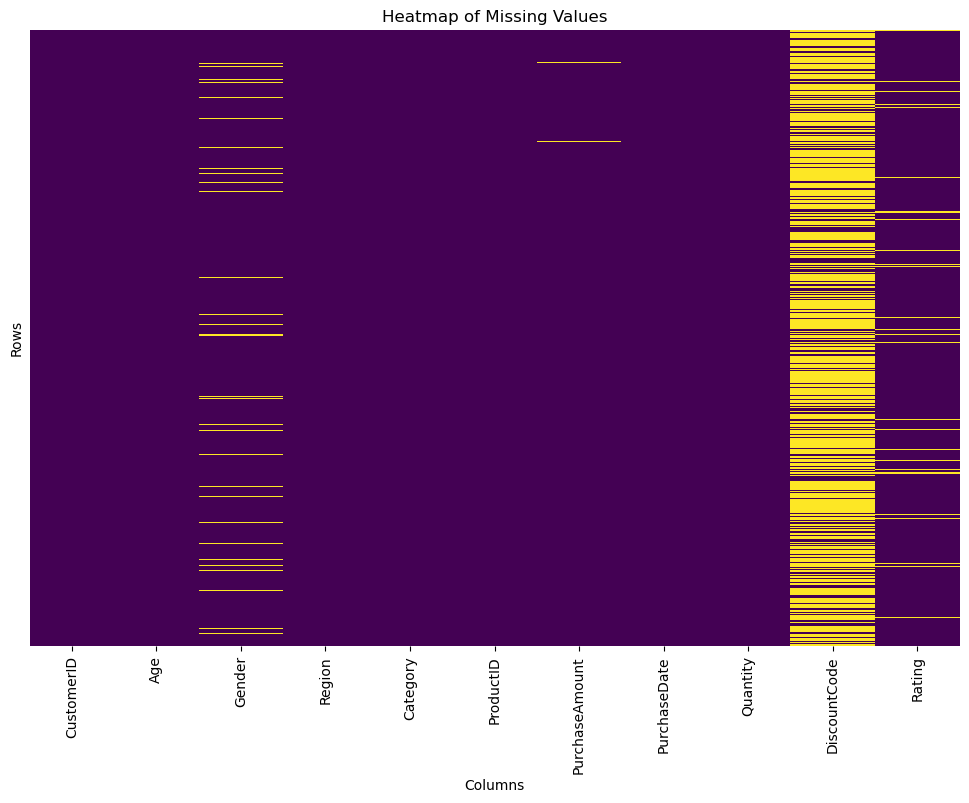

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('uncleaned_complex_dataset_v2.csv')

# Plot heatmap for missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


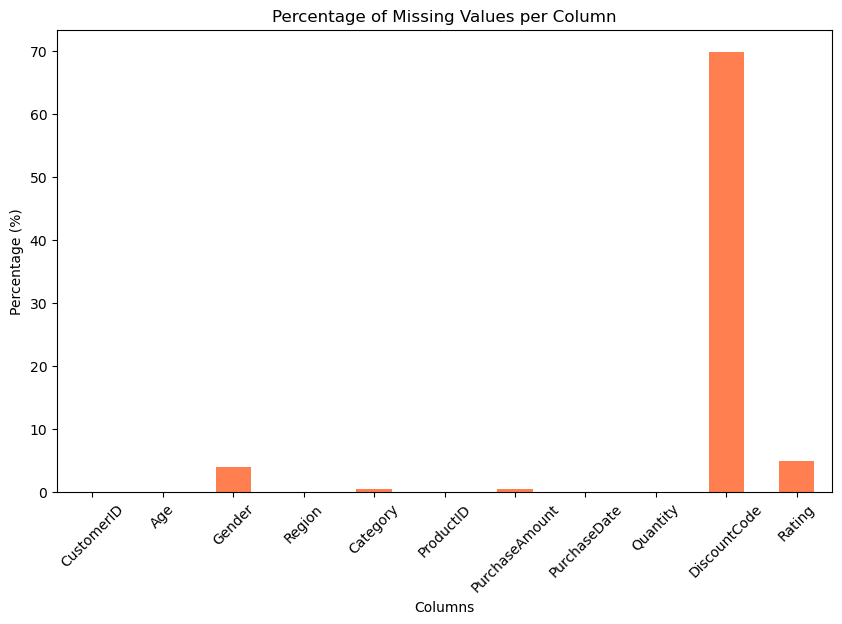

In [67]:
# Calculate percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Plot bar chart for missing values percentage
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='coral')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


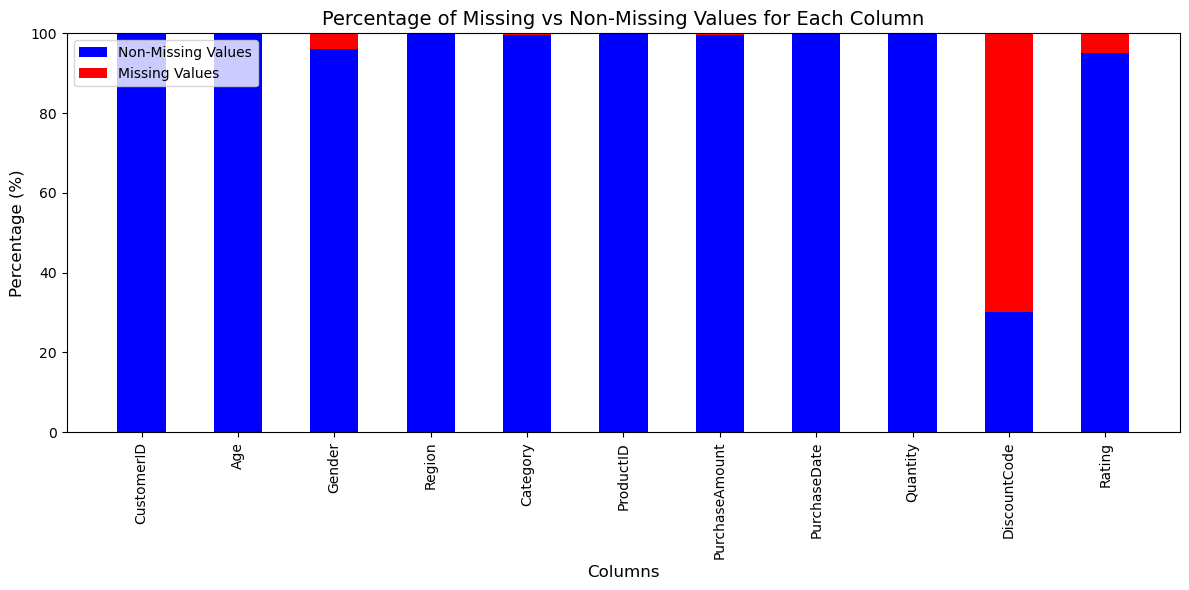

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('uncleaned_complex_dataset_v2.csv')

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100  # Percentage of missing values
non_missing_percentage = 100 - missing_percentage  # Percentage of non-missing values

# Set up the figure for the plot
plt.figure(figsize=(12, 6))

# Define the bar width and positions
bar_width = 0.5
columns = df.columns
indices = np.arange(len(columns))

# Plotting the bars for non-missing values
plt.bar(indices, non_missing_percentage, bar_width, label='Non-Missing Values', color='blue')

# Plotting the bars for missing values
plt.bar(indices, missing_percentage, bar_width, bottom=non_missing_percentage, label='Missing Values', color='red')

# Adding titles and labels
plt.title('Percentage of Missing vs Non-Missing Values for Each Column', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(indices, columns, rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()



/tmp/ipykernel_6334/3829540586.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_percentage = (df.applymap(lambda x: x == '' or x == ' ')).mean() * 100


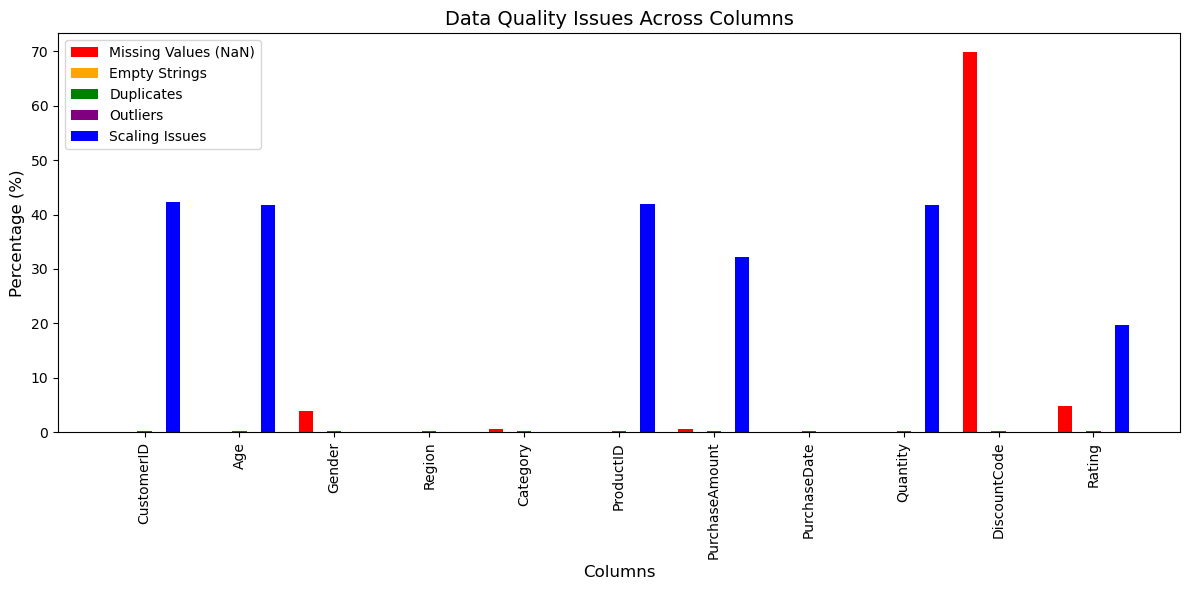

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('uncleaned_complex_dataset_v2.csv')

# Calculate missing values percentage
missing_percentage = df.isnull().mean() * 100

# Calculate empty string percentage (e.g., '')
empty_percentage = (df.applymap(lambda x: x == '' or x == ' ')).mean() * 100

# Calculate duplicates percentage (based on entire row duplication)
duplicate_percentage = df.duplicated().mean() * 100

# Detect outliers using IQR for numerical columns only
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum() / len(df) * 100

# Apply outlier detection for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
outlier_percentage = df[numerical_columns].apply(detect_outliers).mean()

# Scaling issue: Calculate scaling based on extreme ranges (e.g., values outside [0,1] after scaling)
def detect_scaling(df):
    scaled_columns = df.select_dtypes(include=[np.number])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(scaled_columns.fillna(0))  # Fill NaN with 0 for scaling
    return ((scaled_data > 1) | (scaled_data < -1)).sum(axis=0) / len(scaled_data) * 100

scaling_percentage = detect_scaling(df)

# Create the plot for each data problem
plt.figure(figsize=(12, 6))

# Set up the bar width and positions
bar_width = 0.15
columns = df.columns
indices = np.arange(len(columns))

# Ensure all percentages are aligned with the columns
missing_percentage = missing_percentage.reindex(columns, fill_value=0)
empty_percentage = empty_percentage.reindex(columns, fill_value=0)
duplicate_percentage = pd.Series([duplicate_percentage] * len(columns), index=columns)
outlier_percentage = pd.Series([outlier_percentage] * len(columns), index=columns)
scaling_percentage = pd.Series(scaling_percentage, index=numerical_columns).reindex(columns, fill_value=0)

# Plot each issue in a different color
plt.bar(indices, missing_percentage, bar_width, label='Missing Values (NaN)', color='red')
plt.bar(indices + bar_width, empty_percentage, bar_width, label='Empty Strings', color='orange')
plt.bar(indices + 2 * bar_width, duplicate_percentage, bar_width, label='Duplicates', color='green')
plt.bar(indices + 3 * bar_width, outlier_percentage, bar_width, label='Outliers', color='purple')
plt.bar(indices + 4 * bar_width, scaling_percentage, bar_width, label='Scaling Issues', color='blue')

# Add titles and labels
plt.title('Data Quality Issues Across Columns', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(indices + 2 * bar_width, columns, rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


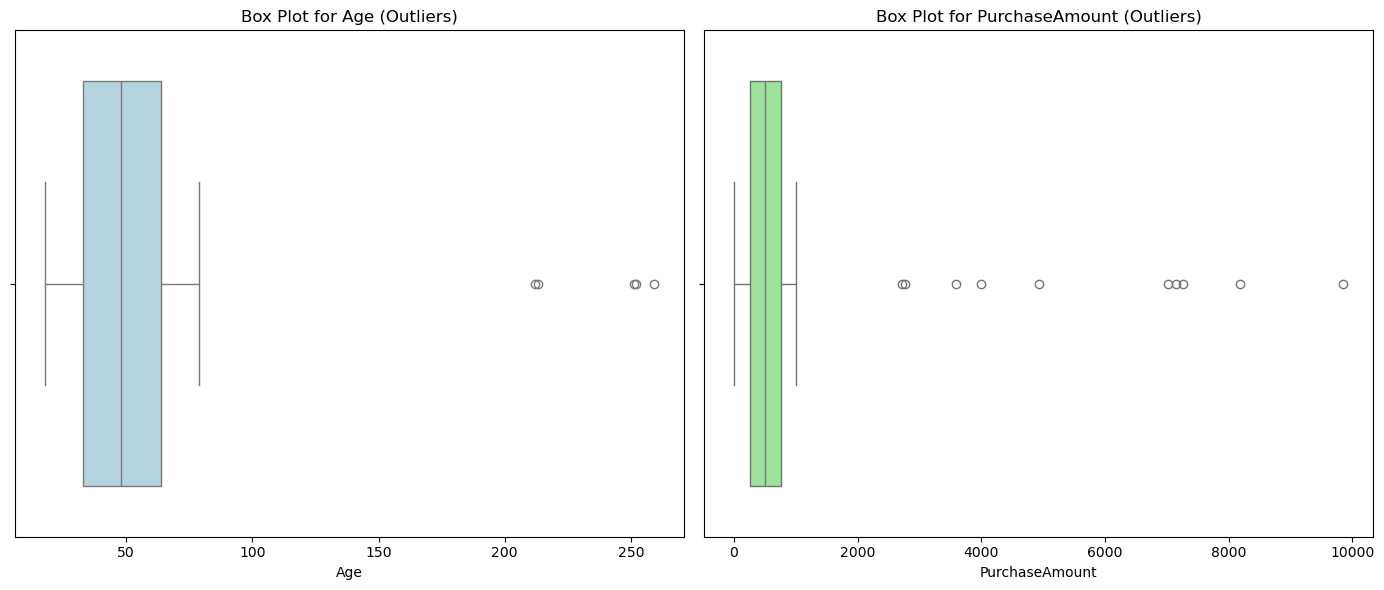

In [68]:
# Box plots for numerical columns
plt.figure(figsize=(14, 6))

# Age
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Age', color='lightblue')
plt.title('Box Plot for Age (Outliers)')

# PurchaseAmount
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='PurchaseAmount', color='lightgreen')
plt.title('Box Plot for PurchaseAmount (Outliers)')

plt.tight_layout()
plt.show()


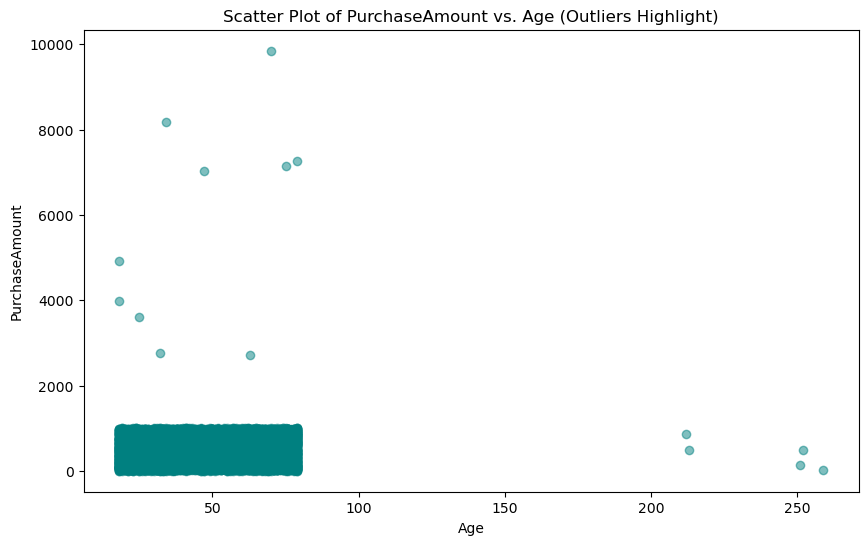

In [69]:
# Scatter plot for PurchaseAmount by Age
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['PurchaseAmount'], alpha=0.5, color='teal')
plt.title('Scatter Plot of PurchaseAmount vs. Age (Outliers Highlight)')
plt.xlabel('Age')
plt.ylabel('PurchaseAmount')
plt.show()


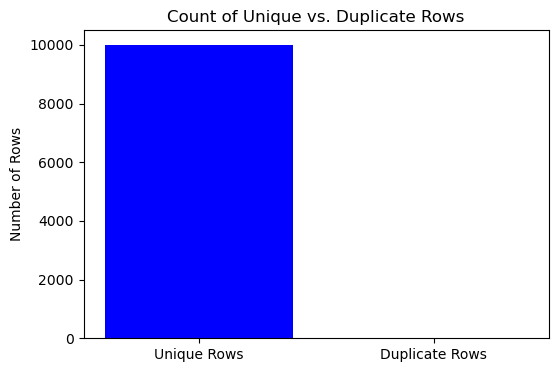

In [70]:
# Count duplicates
duplicates_count = df.duplicated().sum()
unique_count = len(df) - duplicates_count

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Unique Rows', 'Duplicate Rows'], [unique_count, duplicates_count], color=['blue', 'orange'])
plt.title('Count of Unique vs. Duplicate Rows')
plt.ylabel('Number of Rows')
plt.show()


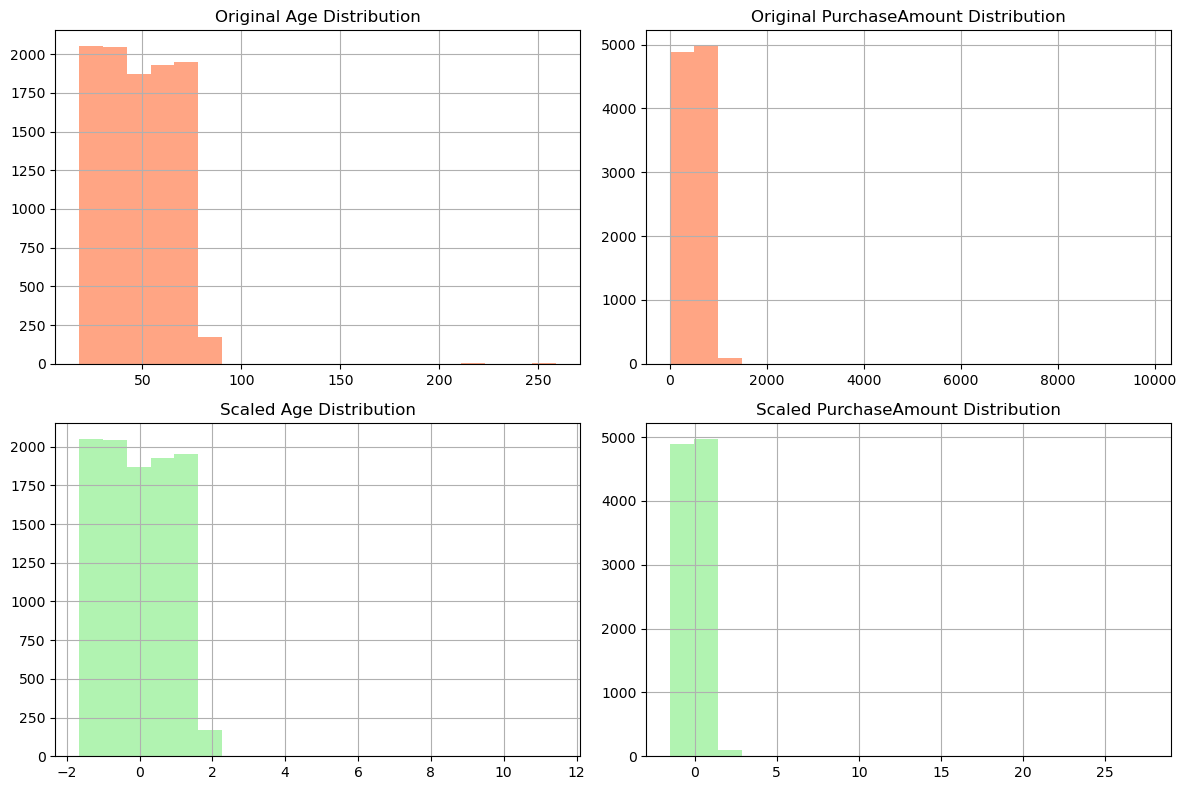

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Columns to scale
columns_to_scale = ['Age', 'PurchaseAmount', 'Quantity']

# Apply Standard Scaling
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Plot histograms before and after scaling
plt.figure(figsize=(12, 8))

# Original data histogram
plt.subplot(2, 2, 1)
df['Age'].hist(bins=20, color='coral', alpha=0.7)
plt.title('Original Age Distribution')

plt.subplot(2, 2, 2)
df['PurchaseAmount'].hist(bins=20, color='coral', alpha=0.7)
plt.title('Original PurchaseAmount Distribution')

# Scaled data histogram
plt.subplot(2, 2, 3)
df_scaled['Age'].hist(bins=20, color='lightgreen', alpha=0.7)
plt.title('Scaled Age Distribution')

plt.subplot(2, 2, 4)
df_scaled['PurchaseAmount'].hist(bins=20, color='lightgreen', alpha=0.7)
plt.title('Scaled PurchaseAmount Distribution')

plt.tight_layout()
plt.show()


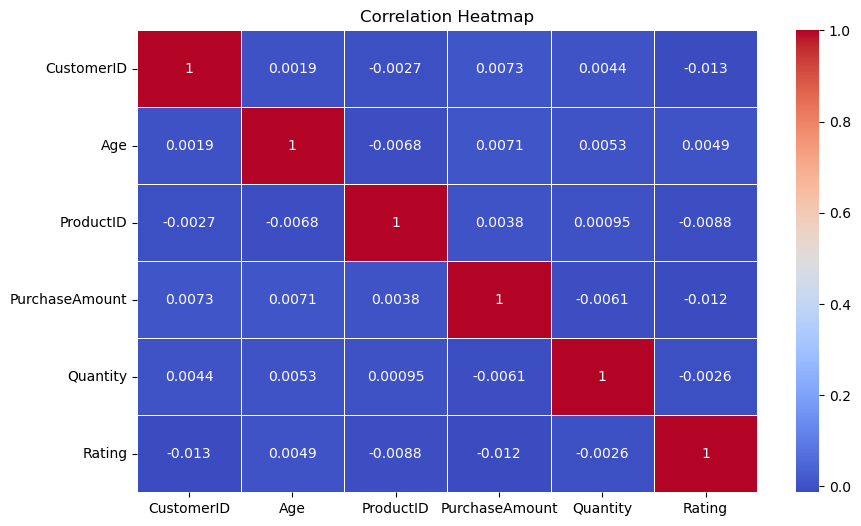

In [73]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))

# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


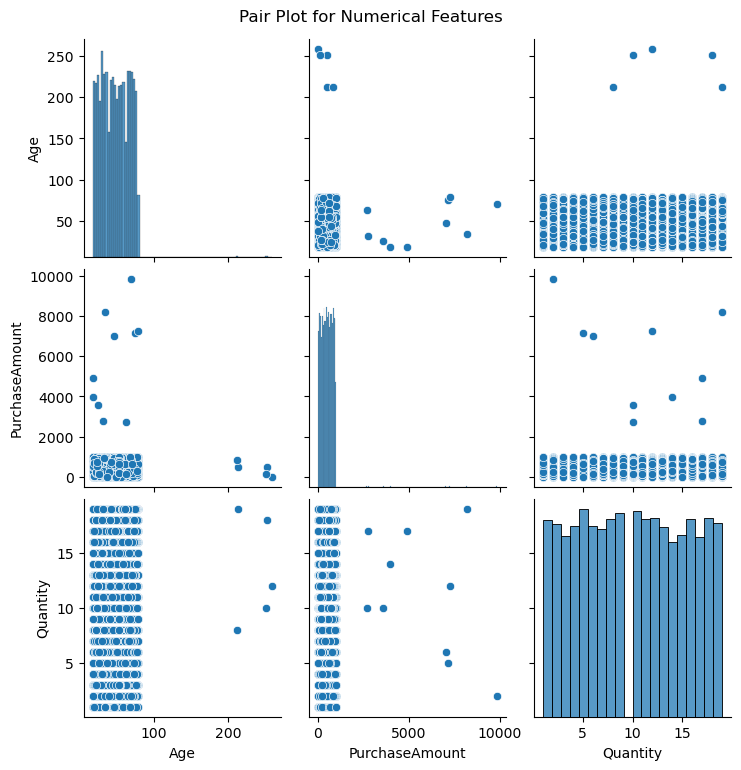

In [74]:
# Pair plot for selected numerical features
sns.pairplot(df[['Age', 'PurchaseAmount', 'Quantity']])
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()


/tmp/ipykernel_6334/2230394487.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')
/tmp/ipykernel_6334/2230394487.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Region', palette='Set3')


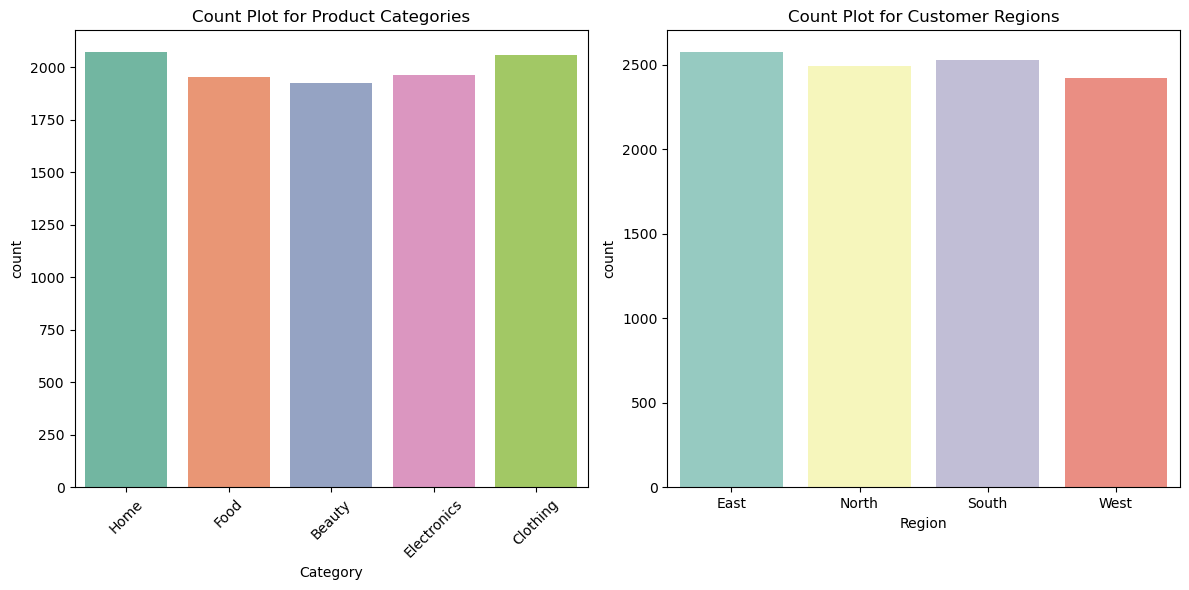

In [75]:
# Count plot for Category
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Category', palette='Set2')
plt.title('Count Plot for Product Categories')
plt.xticks(rotation=45)

# Count plot for Region
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Region', palette='Set3')
plt.title('Count Plot for Customer Regions')

plt.tight_layout()
plt.show()


In [76]:
data.ndim

2

In [78]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('uncleaned_complex_dataset_v2.csv')

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df)

# Let's say we want to create a 3D dataset over 12 months
num_months = 12

# Get the shape of the original 2D dataset
num_rows, num_columns = df_encoded.shape

# Initialize a 3D array with random data for 12 months, each month with the same 2D dataset structure
# Shape: (12 months, num_rows, num_columns)
three_d_array = np.random.rand(num_months, num_rows, num_columns)

# Populate the 3D array using the original data
# Here, we use the same data across each month, but you could adjust this to simulate monthly changes
for month in range(num_months):
    # Fill each "month" with the 2D dataset
    three_d_array[month] = df_encoded.to_numpy()

# Now we have a 3D dataset with the shape (12, num_rows, num_columns)
print(f'Shape of the 3D dataset: {three_d_array.shape}')


Shape of the 3D dataset: (12, 10020, 385)


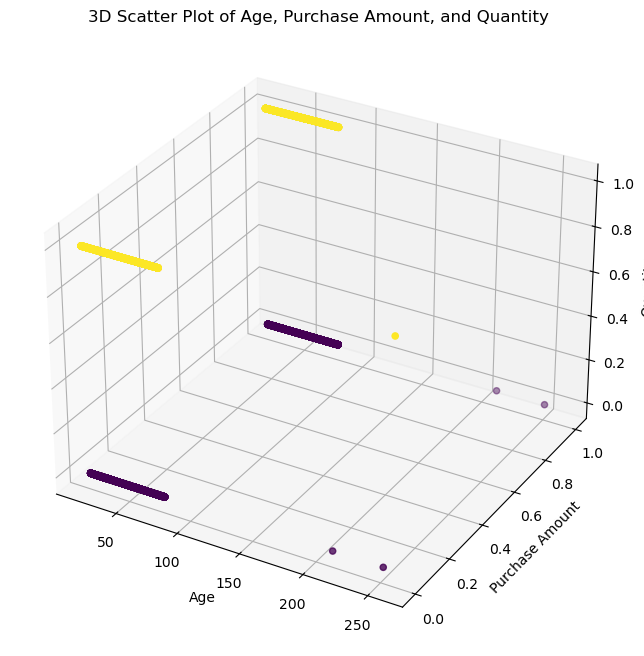

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data for a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Take some random sample from the original 3D data to plot
sample_month = 0  # Pick the first month data as an example
sample_data = three_d_array[sample_month]

# Assuming columns: Age (col index 1), PurchaseAmount (col index 6), Quantity (col index 8)
ax.scatter(sample_data[:, 1], sample_data[:, 6], sample_data[:, 8], c=sample_data[:, 8], cmap='viridis')

# Labels
ax.set_xlabel('Age')
ax.set_ylabel('Purchase Amount')
ax.set_zlabel('Quantity')
plt.title('3D Scatter Plot of Age, Purchase Amount, and Quantity')

plt.show()


In [81]:
# Convert the 3D NumPy array back to a Pandas DataFrame with a MultiIndex
months = range(1, num_months + 1)
multi_index = pd.MultiIndex.from_product([months, df.index], names=["Month", "Row"])
df_3d = pd.DataFrame(three_d_array.reshape(num_months * num_rows, num_columns), index=multi_index, columns=df_encoded.columns)

# Preview the 3D-like DataFrame
print(df_3d.head())


           CustomerID   Age  ProductID  PurchaseAmount  Quantity  Rating  \
Month Row                                                                  
1     0       19165.0  34.0     1556.0          877.23       4.0     4.0   
      1       13080.0  27.0     1425.0          725.12      18.0     3.0   
      2       17400.0  60.0     1036.0          928.30       5.0     1.0   
      3       11422.0  20.0     1906.0          376.92       5.0     NaN   
      4       10264.0  60.0     1569.0          126.40      15.0     4.0   

           Gender_Female  Gender_Male  Region_East  Region_North  ...  \
Month Row                                                         ...   
1     0              0.0          1.0          1.0           0.0  ...   
      1              1.0          0.0          1.0           0.0  ...   
      2              1.0          0.0          0.0           1.0  ...   
      3              0.0          1.0          1.0           0.0  ...   
      4              0.0     

# Data Cleaning with  pandas

In [20]:
import pandas as pd
print(pd.__version__)

2.2.2


In [21]:
df= pd.read_csv('uncleaned_complex_dataset_v2.csv')

In [22]:
df

,CustomerID,Age,Gender,Region,Category,ProductID,PurchaseAmount,PurchaseDate,Quantity,DiscountCode,Rating
0,19165,34,Male,East,Home,1556,877.23,2022-04-25 07:30:59.340659342,4,DISC30,4.0
1,13080,27,Female,East,Food,1425,725.12,2022-07-01 11:56:02.637362638,18,NaN,3.0
2,17400,60,Female,North,Beauty,1036,928.30,2022-09-24 17:32:18.461538464,5,NaN,1.0
3,11422,20,Male,East,Electronics,1906,376.92,2022-11-29 21:53:24.395604396,5,NaN,NaN
4,10264,60,Male,South,Food,1569,126.40,2022-09-06 16:21:05.934065936,15,DISC20,4.0
...,...,...,...,...,...,...,...,...,...,...,...
10015,10071,71,Female,North,Beauty,1816,640.61,2022-05-16 08:54:03.956043956,12,NaN,4.0
10016,18399,24,Male,South,Electronics,1692,550.42,2022-03-01 03:53:24.395604396,10,DISC30,3.0
10017,19503,24,Female,West,Electronics,1070,745.21,2022-08-22 15:21:45.494505496,10,DISC30,1.0
10018,16787,27,Female,East,Electronics,1879,168.45,2022-06-18 11:04:36.923076924,6,DISC10,4.0


# Data Cleaning with Polars


In [23]:
import polars as pl
print(pl.__version__)

1.14.0


In [24]:
# load datasets 
pldf = pl.read_csv('uncleaned_complex_dataset_v2.csv')

In [25]:
pldf

CustomerID,Age,Gender,Region,Category,ProductID,PurchaseAmount,PurchaseDate,Quantity,DiscountCode,Rating
i64,i64,str,str,str,i64,f64,str,i64,str,i64
19165,34,"""Male""","""East""","""Home""",1556,877.23,"""2022-04-25 07:30:59.340659342""",4,"""DISC30""",4
13080,27,"""Female""","""East""","""Food""",1425,725.12,"""2022-07-01 11:56:02.637362638""",18,null,3
17400,60,"""Female""","""North""","""Beauty""",1036,928.3,"""2022-09-24 17:32:18.461538464""",5,null,1
11422,20,"""Male""","""East""","""Electronics""",1906,376.92,"""2022-11-29 21:53:24.395604396""",5,null,null
10264,60,"""Male""","""South""","""Food""",1569,126.4,"""2022-09-06 16:21:05.934065936""",15,"""DISC20""",4
…,…,…,…,…,…,…,…,…,…,…
10071,71,"""Female""","""North""","""Beauty""",1816,640.61,"""2022-05-16 08:54:03.956043956""",12,null,4
18399,24,"""Male""","""South""","""Electronics""",1692,550.42,"""2022-03-01 03:53:24.395604396""",10,"""DISC30""",3
19503,24,"""Female""","""West""","""Electronics""",1070,745.21,"""2022-08-22 15:21:45.494505496""",10,"""DISC30""",1
